In [48]:
from sklearn.decomposition import PCA
from numpy.linalg import eig
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import os
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import Rotator
pio.renderers.default = 'iframe_connected'

In [34]:
# Step-1 : Importing the Dataset
df1 = pd.read_csv('4.FinalDataCleaning.csv')
display(df1.head)




<bound method NDFrame.head of       Under 5 years  5 to 14 years  65 years and over  \
0              10.5           23.7               27.8   
1              21.9           21.9               31.8   
2               4.8            9.5               17.3   
3               7.7           17.9                6.3   
4               0.0           19.4               30.5   
...             ...            ...                ...   
1020            9.5           19.0               21.8   
1021           10.9           18.2               15.7   
1022            7.2           15.9               21.7   
1023            2.4           13.4               29.3   
1024            5.9            8.9               31.5   

      No certificate, diploma or degree  \
0                                   8.1   
1                                   0.0   
2                                   2.8   
3                                   7.0   
4                                   9.1   
...                        

In [35]:
# Step-2 : Standard Scaling
def standardScaler(data):
    '''axis=0 means along the column, axis=1 means working along the row.'''
    scaled_df = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    return scaled_df


scaled_df = standardScaler(df1)
scaled_df = np.around(scaled_df, 2)
display(scaled_df)
column_means = np.mean(scaled_df, axis=0)
column_means[np.abs(column_means) < 1e-2] = 0
display(column_means)


,Under 5 years,5 to 14 years,65 years and over,"No certificate, diploma or degree","Postsecondary certificate, diploma or degree",No high school diploma or equivalency certificate,Renter,One-maintainer household,Between 7 a.m. and 7:59 a.m.,Chinese,...,Unemployed,Female employed,Male not in the labour force,All industries,2000 or before,Public transit,Movers,Average number of rooms per dwelling,Major repairs needed,Fountains
0,0.68,1.46,0.32,0.40,0.33,-0.13,-1.02,-0.05,0.21,-0.72,...,0.24,-0.02,0.37,-0.22,0.16,-0.98,-0.04,1.36,0.24,-0.27
1,2.93,1.17,0.65,-0.93,-0.02,0.10,-0.94,-0.19,-0.58,-0.18,...,-0.60,-0.09,-0.21,0.43,0.58,-0.69,-0.10,0.92,0.13,-0.27
2,-0.44,-0.83,-0.57,-0.47,0.45,0.33,-0.52,-0.94,-0.44,-0.17,...,-0.60,0.02,0.14,-0.25,-0.72,0.72,-0.39,0.23,-0.44,-0.27
3,0.13,0.53,-1.50,0.22,0.16,-0.28,1.33,0.65,0.28,-0.57,...,0.85,0.58,-0.80,0.27,-0.79,1.61,1.52,-1.10,0.53,-0.27
4,-1.39,0.77,0.55,0.56,1.14,0.72,-0.25,0.02,-0.20,0.93,...,0.43,-0.54,0.03,-0.24,0.03,-0.45,0.68,0.61,-0.10,-0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.48,0.70,-0.19,-0.93,-1.67,-1.15,-1.84,0.30,-0.12,-0.94,...,0.24,0.92,0.61,0.43,0.82,-1.48,-0.36,-0.21,0.34,-0.27
1021,0.76,0.58,-0.70,-0.46,-1.33,-0.84,0.33,-0.35,0.22,-0.93,...,0.24,1.03,0.61,0.29,1.11,-0.70,0.19,-0.84,0.89,-0.27
1022,0.03,0.21,-0.20,0.69,1.16,0.94,0.31,-0.70,-0.04,-0.14,...,0.24,-0.24,-0.21,0.18,-0.14,0.47,-1.48,0.10,0.07,0.73
1023,-0.92,-0.20,0.44,0.09,0.86,0.75,-0.47,-0.68,1.17,1.52,...,0.65,-0.24,0.72,-0.04,-0.08,-0.63,-0.51,0.48,-0.37,-0.27


Under 5 years                                           0.0
5 to 14 years                                           0.0
65 years and over                                       0.0
No certificate, diploma or degree                       0.0
Postsecondary certificate, diploma or degree            0.0
No high school diploma or equivalency certificate       0.0
Renter                                                  0.0
One-maintainer household                                0.0
Between 7 a.m. and 7:59 a.m.                            0.0
Chinese                                                 0.0
Filipino                                                0.0
Total visible minority population                       0.0
First Nations (North American Indian)                   0.0
Average total income of household in 2020 ($)           0.0
Spending 30% or more of income on shelter costs only    0.0
Government transfers (%)                                0.0
Median value of dwellings ($)           

                                                    Under 5 years  \
Under 5 years                                                1.00   
5 to 14 years                                                0.13   
65 years and over                                           -0.09   
No certificate, diploma or degree                           -0.18   
Postsecondary certificate, diploma or degree                -0.20   
No high school diploma or equivalency certificate           -0.18   
Renter                                                      -0.04   
One-maintainer household                                     0.02   
Between 7 a.m. and 7:59 a.m.                                 0.06   
Chinese                                                     -0.07   
Filipino                                                    -0.18   
Total visible minority population                           -0.19   
First Nations (North American Indian)                        0.02   
Average total income of household 

<Axes: >

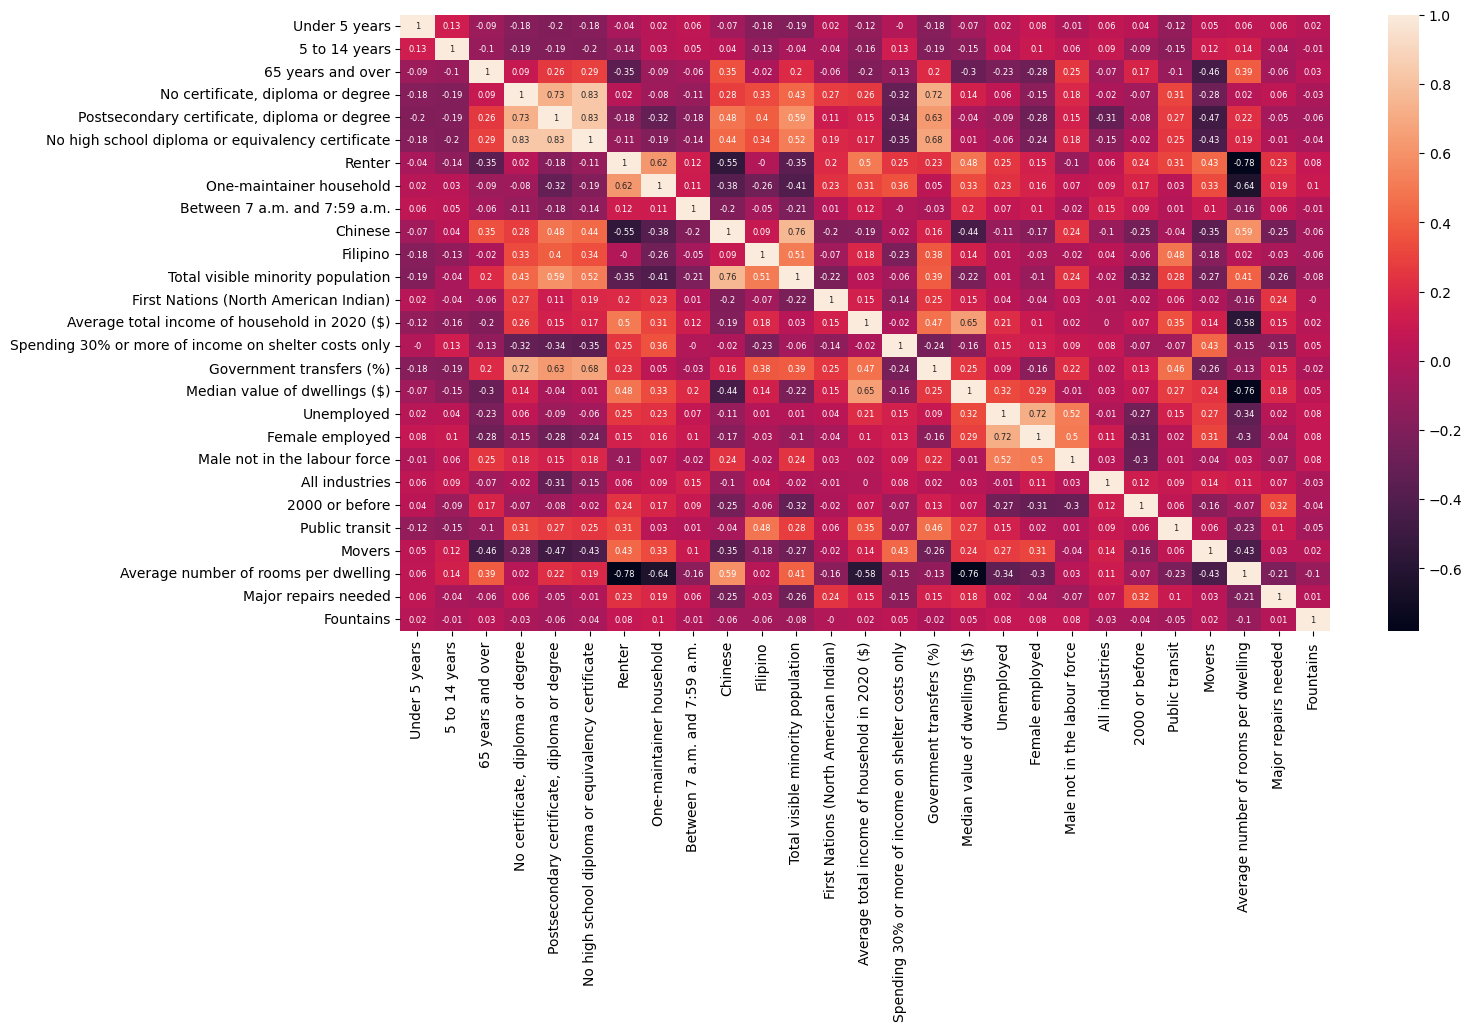

In [36]:
# Step-3 : Computing Covariance Matrix


def computeCovarianceMatrix(data):
    len_data = data.shape[0]
    covariance = data.T.dot(data)/len_data
    return covariance


cov_mat = computeCovarianceMatrix(scaled_df)
cov_mat = np.around(cov_mat, 2)
print(cov_mat)

# Plotting the Covariance Matrix as Heatmap
fig = plt.figure(figsize=(15, 8))
'''Annotate each cell with the numeric value using integer formatting'''
sn.heatmap(cov_mat.round(2), annot=True, fmt='g', annot_kws={"fontsize": 6})

In [37]:
# Step-4 : Eigen Decomposition of Covariance Matrix
# Check for zero eigenvalues
eig_values, eig_vectors = np.linalg.eig(cov_mat)
if np.any(np.isclose(eig_values, 0)):
    print("Zero eigenvalues found. Handle the condition accordingly.")

print('\nNumber of Eigenvectors : %s ' % len(eig_vectors))
print('\nEigenvectors : \n\n%s' % eig_vectors)
print('\nEigenvalues : \n\n%s' % eig_values)


# Visualize above eigenvectors as a dataframe (or coefficient matrix)
eigenvec_df = pd.DataFrame(eig_vectors)
eigenvec_df.columns = ['eigvec_'+str(i+1) for i in range(0, len(eig_vectors))]
display(eigenvec_df.T)


Number of Eigenvectors : 27 

Eigenvectors : 

[[-7.50351255e-02 -1.07009203e-01 -1.01621582e-02 -1.48420498e-01
   2.80782300e-01 -7.15109583e-02 -2.14502380e-01 -2.27720080e-01
   1.54225977e-01 -6.86518002e-01 -4.86735499e-01 -3.42127261e-02
   1.12377941e-01  1.02945617e-01 -2.93373827e-02  1.22332504e-01
  -5.24361546e-02  1.58100947e-02  8.25670932e-03  1.89219119e-02
   2.15526955e-02  3.20789747e-02  3.53594777e-02  7.46813310e-03
   3.46027152e-03 -2.24088638e-02 -1.59979327e-04]
 [-5.02915743e-02 -1.43304241e-01  1.24992029e-01 -3.87890553e-02
   9.66549465e-02 -1.94125937e-01 -3.68350231e-01  8.66508613e-02
   3.45719681e-01 -1.97994624e-01  7.11424510e-01 -1.50486387e-01
   2.38576691e-01 -4.94964336e-02  7.38907900e-02  2.23038033e-02
  -2.07066584e-02  2.07564481e-02 -2.14397612e-02 -5.17877017e-03
   2.01551619e-02  2.02922294e-02  2.98510160e-02  5.27724702e-02
   3.94539413e-02 -8.50433729e-02  4.62562766e-02]
 [ 2.06414015e-01 -7.27576887e-02 -9.02881476e-02 -3.38792

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
eigvec_1,-0.075035,-0.050292,0.206414,0.239578,0.331406,0.309400,-0.252758,-0.253007,-0.111656,0.313747,...,-0.124877,-0.170124,0.057799,-0.066850,-0.051079,0.044114,-0.276534,0.284454,-0.083067,-0.044933
eigvec_2,-0.107009,-0.143304,-0.072758,0.300443,0.209396,0.240264,0.282678,0.155804,0.031772,-0.092858,...,0.160256,0.058755,0.071465,-0.013430,0.038008,0.285089,0.021145,-0.294723,0.125060,0.012761
eigvec_3,-0.010162,0.124992,-0.090288,0.007042,-0.006011,-0.021402,-0.079105,-0.026926,-0.036904,0.192265,...,0.430298,0.442242,0.421340,0.010578,-0.419710,0.023178,0.166318,0.004999,-0.227636,0.051801
eigvec_4,-0.148420,-0.038789,-0.338793,-0.111567,-0.042144,-0.136759,0.042255,-0.246585,-0.010980,-0.012858,...,-0.154109,-0.099471,-0.383847,0.097105,-0.070873,0.306590,0.201483,-0.017064,-0.201837,-0.180486
eigvec_5,0.280782,0.096655,-0.174396,0.014089,-0.055286,-0.041953,-0.226757,-0.337634,0.268602,-0.174658,...,0.132651,0.259356,0.020143,0.200593,-0.035576,0.027615,-0.143653,0.109727,0.211109,-0.113285
eigvec_6,-0.071511,-0.194126,-0.220688,0.002535,0.141049,0.025053,-0.059886,-0.154842,-0.229627,-0.092706,...,0.005644,0.006919,-0.170741,-0.644737,-0.317956,-0.220167,-0.024958,-0.170917,-0.147713,0.097178
eigvec_7,-0.214502,-0.368350,0.379177,-0.218312,-0.061764,-0.102998,-0.053382,-0.058286,0.227789,-0.051226,...,0.075649,0.132259,0.139152,-0.100550,0.221689,-0.018496,-0.242710,-0.091103,-0.117065,0.271081
eigvec_8,-0.227720,0.086651,0.077030,0.020830,0.041224,0.050994,-0.065906,0.064927,0.527551,0.067479,...,-0.045025,-0.047226,0.019027,-0.088817,-0.071791,-0.206366,-0.007521,-0.054128,-0.263098,-0.653285
eigvec_9,0.154226,0.345720,-0.084900,0.088594,0.049961,0.077459,-0.020806,0.018958,0.460171,0.074557,...,-0.179707,-0.164133,-0.145869,0.055922,-0.151110,-0.101250,0.016354,-0.019265,-0.275154,0.616438
eigvec_10,-0.686518,-0.197995,-0.006112,0.095019,-0.116047,-0.014744,-0.060262,-0.035016,0.014373,-0.151169,...,-0.073209,0.022208,0.004153,0.402539,-0.223162,-0.083148,0.055356,0.087848,-0.066610,0.189315


In [38]:
# Step-5 : Sort the eigenvalues in descending order
indexes = eig_values.argsort()[::-1]
eig_values = eig_values[indexes]
eig_vectors = eig_vectors[:, indexes]
sorted_eig_pairs = [(np.around(np.abs(eig_values[i]), 2),
                     eig_vectors[:, i]) for i in range(len(eig_values))]
print('\nSorted Eigen-pairs (descending order) :\n')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print("eigenvec_{0} : {1}".format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])

print("\nTotal Variance (sum of all eigenvalues) : ",
      round(sum(sorted_eigenValues), 2))



Sorted Eigen-pairs (descending order) :

eigenvec_1 : 5.6
eigenvec_2 : 4.37
eigenvec_3 : 2.62
eigenvec_4 : 1.65
eigenvec_5 : 1.4
eigenvec_6 : 1.33
eigenvec_7 : 1.16
eigenvec_8 : 0.97
eigenvec_9 : 0.93
eigenvec_10 : 0.89
eigenvec_11 : 0.82
eigenvec_12 : 0.72
eigenvec_13 : 0.69
eigenvec_14 : 0.59
eigenvec_15 : 0.47
eigenvec_16 : 0.46
eigenvec_17 : 0.4
eigenvec_18 : 0.34
eigenvec_19 : 0.3
eigenvec_20 : 0.27
eigenvec_21 : 0.23
eigenvec_22 : 0.21
eigenvec_23 : 0.17
eigenvec_24 : 0.14
eigenvec_25 : 0.12
eigenvec_26 : 0.1
eigenvec_27 : 0.06

Total Variance (sum of all eigenvalues) :  27.01



According to Kaiser's Stopping Rule :
Number of PCs to be considered for PCA is : 7
Their Eigenvalues are : [5.6, 4.37, 2.62, 1.65, 1.4, 1.33, 1.16]

Cumulative Variance Percentage : 
Component 1: 20.73%
Component 2: 36.91%
Component 3: 46.61%
Component 4: 52.72%
Component 5: 57.9%
Component 6: 62.83%
Component 7: 67.12%
Component 8: 70.71%
Component 9: 74.16%
Component 10: 77.45%
Component 11: 80.49%
Component 12: 83.15%
Component 13: 85.71%
Component 14: 87.89%
Component 15: 89.63%
Component 16: 91.34%
Component 17: 92.82%
Component 18: 94.08%
Component 19: 95.19%
Component 20: 96.19%
Component 21: 97.04%
Component 22: 97.82%
Component 23: 98.45%
Component 24: 98.96%
Component 25: 99.41%
Component 26: 99.78%
Component 27: 100.0%


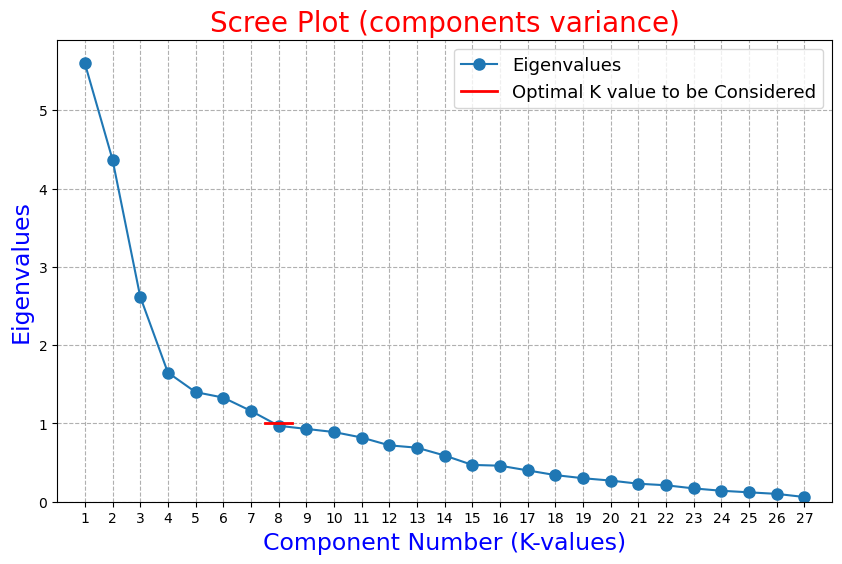

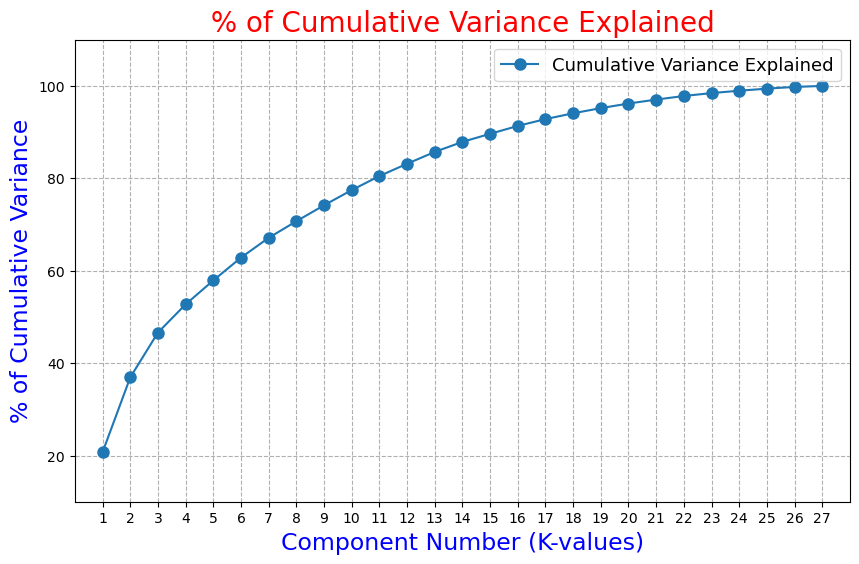

In [39]:
# Step-6 : Decide the value of "K"

# Method-1 : Kaiser’s Stopping Rule
# Choosing all PCs which Eigenvalues are larger than 1
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(
    0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] > 1.0]
print("\nAccording to Kaiser's Stopping Rule :")
print("Number of PCs to be considered for PCA is : {}".format(
    str(len(best_eig_pairs))))
print("Their Eigenvalues are : {}".format(str(best_eig_pairs)))


# Method-2 : Scree Plot
fig = plt.figure(figsize=(10, 6))
plt.title("Scree Plot (components variance)", color='Red', fontsize=20)
plt.xticks(np.arange(1, 28, 1))
plt.xlim(0, 28)
plt.ylim(0, 5.9)
plt.ylabel("Eigenvalues", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, len(sorted_eigenValues) + 1), sorted_eigenValues, linestyle='-',
         label="Eigenvalues", marker='o', markersize=8)
plt.plot([7.5, 8.5], [1.0, 1.0], color='red', linestyle='-',
         lw=2, label="Optimal K value to be Considered")
plt.legend(loc=1, prop={'size': 13})
#plt.show()


# Method-3 : Cumulative Variance Plot
cumulative_variance = {}
ith_cumulative_variance = 0
for i in range(0, len(sorted_eig_pairs)):
    ith_explained_variance = sorted_eig_pairs[i][0]/sum(sorted_eigenValues)
    # print(ith_explained_variance)
    ith_cumulative_variance += ith_explained_variance
    cumulative_variance[str(i+1)] = round(ith_cumulative_variance*100, 2)

print("\nCumulative Variance Percentage : ")
for component, variance in cumulative_variance.items():
    print("Component {}: {}%".format(component, variance))

fig = plt.figure(figsize=(10, 6))
plt.title(" % of Cumulative Variance Explained ", color='Red', fontsize=20)
plt.xticks(np.arange(1, 28, 1))
plt.xlim(0, 28)
plt.ylim(10, 110)
plt.ylabel("% of Cumulative Variance", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, 28), sorted(list(cumulative_variance.values())[:28]), linestyle='-',
         label="Cumulative Variance Explained", marker='o', markersize=8)
plt.legend(loc=1, prop={'size': 13})
#plt.show()

In [42]:
# Step-7 : Projection matrix construction (K=8 from method- 3)
K = 8
projection_matrix = np.array(
    [list(np.hstack(i[1].reshape(27, 1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print("\nProjection-Matrix Dimension ... ", projection_matrix.shape)
display(projection_matrix)


Projection-Matrix Dimension ...  (8, 27)


array([[-0.07503513, -0.05029157,  0.20641401,  0.23957754,  0.33140645,
         0.30940003, -0.25275757, -0.25300701, -0.11165554,  0.31374732,
         0.1626096 ,  0.31598295, -0.02775369, -0.0815821 , -0.16306064,
         0.18224764, -0.17536452, -0.12487749, -0.17012427,  0.05779921,
        -0.06684977, -0.05107875,  0.04411406, -0.27653394,  0.28445424,
        -0.08306711, -0.04493317],
       [-0.1070092 , -0.14330424, -0.07275769,  0.30044253,  0.20939616,
         0.24026439,  0.282678  ,  0.1558038 ,  0.03177167, -0.09285793,
         0.19585671,  0.065167  ,  0.16158744,  0.35347003, -0.08884916,
         0.36104956,  0.32388756,  0.16025603,  0.05875512,  0.07146488,
        -0.01342972,  0.03800819,  0.28508898,  0.02114463, -0.2947233 ,
         0.12505983,  0.01276138],
       [-0.01016216,  0.12499203, -0.09028815,  0.00704218, -0.0060114 ,
        -0.02140217, -0.07910532, -0.02692597, -0.0369035 ,  0.19226454,
         0.04471111,  0.24478308, -0.12087987, -0.0067

In [44]:
# Step-8 Projection Matrix as Dataframe
projection_matrix_df = pd.DataFrame(projection_matrix)
projection_matrix_df.columns = [str(i+1) for i in range(0, len(eig_vectors))]
projection_matrix_df = projection_matrix_df.set_index(
    [pd.Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])])

# Print the DataFrame
display(projection_matrix_df)
display(projection_matrix_df.T)

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
PC1,-0.075035,-0.050292,0.206414,0.239578,0.331406,0.309400,-0.252758,-0.253007,-0.111656,0.313747,...,-0.124877,-0.170124,0.057799,-0.066850,-0.051079,0.044114,-0.276534,0.284454,-0.083067,-0.044933
PC2,-0.107009,-0.143304,-0.072758,0.300443,0.209396,0.240264,0.282678,0.155804,0.031772,-0.092858,...,0.160256,0.058755,0.071465,-0.013430,0.038008,0.285089,0.021145,-0.294723,0.125060,0.012761
PC3,-0.010162,0.124992,-0.090288,0.007042,-0.006011,-0.021402,-0.079105,-0.026926,-0.036904,0.192265,...,0.430298,0.442242,0.421340,0.010578,-0.419710,0.023178,0.166318,0.004999,-0.227636,0.051801
PC4,-0.148420,-0.038789,-0.338793,-0.111567,-0.042144,-0.136759,0.042255,-0.246585,-0.010980,-0.012858,...,-0.154109,-0.099471,-0.383847,0.097105,-0.070873,0.306590,0.201483,-0.017064,-0.201837,-0.180486
PC5,0.280782,0.096655,-0.174396,0.014089,-0.055286,-0.041953,-0.226757,-0.337634,0.268602,-0.174658,...,0.132651,0.259356,0.020143,0.200593,-0.035576,0.027615,-0.143653,0.109727,0.211109,-0.113285
PC6,-0.071511,-0.194126,-0.220688,0.002535,0.141049,0.025053,-0.059886,-0.154842,-0.229627,-0.092706,...,0.005644,0.006919,-0.170741,-0.644737,-0.317956,-0.220167,-0.024958,-0.170917,-0.147713,0.097178
PC7,-0.214502,-0.368350,0.379177,-0.218312,-0.061764,-0.102998,-0.053382,-0.058286,0.227789,-0.051226,...,0.075649,0.132259,0.139152,-0.100550,0.221689,-0.018496,-0.242710,-0.091103,-0.117065,0.271081
PC8,-0.227720,0.086651,0.077030,0.020830,0.041224,0.050994,-0.065906,0.064927,0.527551,0.067479,...,-0.045025,-0.047226,0.019027,-0.088817,-0.071791,-0.206366,-0.007521,-0.054128,-0.263098,-0.653285


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
1,-0.075035,-0.107009,-0.010162,-0.148420,0.280782,-0.071511,-0.214502,-0.227720
2,-0.050292,-0.143304,0.124992,-0.038789,0.096655,-0.194126,-0.368350,0.086651
3,0.206414,-0.072758,-0.090288,-0.338793,-0.174396,-0.220688,0.379177,0.077030
4,0.239578,0.300443,0.007042,-0.111567,0.014089,0.002535,-0.218312,0.020830
5,0.331406,0.209396,-0.006011,-0.042144,-0.055286,0.141049,-0.061764,0.041224
6,0.309400,0.240264,-0.021402,-0.136759,-0.041953,0.025053,-0.102998,0.050994
7,-0.252758,0.282678,-0.079105,0.042255,-0.226757,-0.059886,-0.053382,-0.065906
8,-0.253007,0.155804,-0.026926,-0.246585,-0.337634,-0.154842,-0.058286,0.064927
9,-0.111656,0.031772,-0.036904,-0.010980,0.268602,-0.229627,0.227789,0.527551
10,0.313747,-0.092858,0.192265,-0.012858,-0.174658,-0.092706,-0.051226,0.067479


In [49]:
# step-9 : Varimax rotation method ( for representing the adjusted correlations between variables and componaents. considering the value higher than 0.3 )
pca = PCA()
components = projection_matrix_df.T

rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(components)
rotated_loadings_df = pd.DataFrame(rotated_loadings, columns=[
                                   'PC{}'.format(i+1) for i in range(rotated_loadings.shape[1])])
rotated_loadings_df = rotated_loadings_df.where(
    rotated_loadings_df.abs() > 0.3, np.nan)
rotated_loadings_df = rotated_loadings_df.fillna(0)
display(rotated_loadings_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.401895,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.588080,0.000000
3,0.443209,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.390986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.428662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,-0.351108,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,-0.487654,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.594645
9,0.000000,-0.301121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
# step-10 : variance percentage of first thirteen components
cumulative_variance = {}
for i in range(0, 8):
    ith_explained_variance = sorted_eig_pairs[i][0] / sum(sorted_eigenValues)
    ith_variance_percentage = round(ith_explained_variance * 100, 2)
    cumulative_variance[str(i + 1)] = ith_variance_percentage

print("\nVariance Percentage for the First Thirteen Components: ")
for component, variance in cumulative_variance.items():
    print("Component {}: {}%".format(component, variance))


Variance Percentage for the First Thirteen Components: 
Component 1: 20.73%
Component 2: 16.18%
Component 3: 9.7%
Component 4: 6.11%
Component 5: 5.18%
Component 6: 4.92%
Component 7: 4.29%
Component 8: 3.59%


In [52]:
# step-11 : calculating W of each component (W=(proportion of variance for each component)/(Total variance explained))
summation_variance = 0
for i in range(0, 8):  # Iterate over the first thirteen components
    ith_explained_variance = sorted_eig_pairs[i][0]
    summation_variance += ith_explained_variance

W = {}
for i in range(0, 8):
    ith_explained_variance = sorted_eig_pairs[i][0]
    ith_variance_percentage = ith_explained_variance / summation_variance
    W[str(i+1)] = ith_variance_percentage

data = []
for component, w in W.items():
    data.append(w)

df2 = pd.DataFrame(data, columns=['Value'])
df2 = pd.DataFrame(data)
print(df2)

#print("Shape of rotated_loadings_df:", rotated_loadings_df.shape)
#print("Shape of df:", df2.shape)

          0
0  0.293194
1  0.228796
2  0.137173
3  0.086387
4  0.073298
5  0.069634
6  0.060733
7  0.050785


In [53]:
# step-12 : Result (sigma (Wi*PCi) )
result = np.nan_to_num(rotated_loadings_df) @ np.nan_to_num(df2)
result_df = pd.DataFrame(result, columns=['Result'])
display(result_df)

,Result
0,-0.027985
1,0.000000
2,0.035716
3,0.129946
4,0.114635
5,0.125681
6,-0.025736
7,-0.035744
8,0.030199
9,-0.068895


In [54]:
# step-13 : SoVI matrix (original data*Result)
SoVI = np.matmul(scaled_df.to_numpy(), result_df.to_numpy())
SoVI_df = pd.DataFrame(SoVI)
display(SoVI_df)
# step-14 : Min-Max Scaler
scaler = MinMaxScaler(feature_range=(0, 100))
scaled_data = scaler.fit_transform(SoVI_df)
df_scaled = pd.DataFrame(scaled_data)
display(df_scaled)

,0
0,-0.018810
1,-0.387114
2,0.145027
3,0.208726
4,0.315528
...,...
1020,-0.437911
1021,-0.098954
1022,0.579428
1023,0.436077


,0
0,41.514909
1,35.599925
2,44.146151
3,45.169159
4,46.884404
...,...
1020,34.784127
1021,40.227799
1022,51.122647
1023,48.820419


In [59]:
# step-15 : mapping
df3 = pd.read_csv('SoVI_data-pc8.csv')
print(df3.head)


# Add column for size of dots
size = []
for i in range(len(df3)):
    size.append(1)

df3['Size'] = size

# Token
access_token = "pk.eyJ1IjoiYXJtaXNpbmFlaSIsImEiOiJjbGlpeXBhcWQwMnFhM21waDM4MWtzdXR6In0.ABSEkduUBc8wsJVvf7MIJA"
px.set_mapbox_access_token(access_token)

# Setting up the plot
fig = px.scatter_mapbox(df3, lat='Latitude',
                        lon='Longitude', color='SoVI', color_continuous_scale=[[0, 'green'], [0.5, 'yellow'], [1, 'red']],
                        hover_name='DGUID', hover_data=dict(Latitude=False, Longitude=False, SoVI=True),
                        mapbox_style='dark', title='Social Vulnerability Map',
                        size='Size',
                        size_max=1.75,
                        opacity=1,
                        zoom=10,
                        width=800,
                        height=500)

fig.update_layout(title_x=0.2,
                  title_y=0.875)
fig.show()

<bound method NDFrame.head of                   DGUID       SoVI  Latitude  Longitude          geometry  \
0     2021S051259150307  41.514909    49.289   -123.026  -123.026  49.289   
1     2021S051259150308  35.599925    49.284   -123.026  -123.026  49.284   
2     2021S051259150309  44.146151    49.283   -123.030   -123.03  49.283   
3     2021S051259150310  45.169159    49.282   -123.026  -123.026  49.282   
4     2021S051259150311  46.884404    49.279   -123.029  -123.029  49.279   
...                 ...        ...       ...        ...               ...   
1020  2021S051259154192  34.784127    49.265   -123.129  -123.129  49.265   
1021  2021S051259154193  40.227799    49.264   -123.124  -123.124  49.264   
1022  2021S051259154194  51.122647    49.235   -123.047  -123.047  49.235   
1023  2021S051259154195  48.820419    49.231   -123.045  -123.045  49.231   
1024  2021S051259154196  50.093283    49.235   -123.056  -123.056  49.235   

              area  
0     295589.22730  
1  